# TMDB Movies Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning&storing">Cleaning and Storing data</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project aim is to explore and analyze the TMDB Movies dataset, this project will be devided into two parts, the first part will be the exploratory phase of the TMDB Movies dataset, while the second part will be the explanatory phase of the data. The reason why I chose the TMDB Movies dataset is because I had a personal interest and curiousity towards this dataset. I'm interested in the properties which are related to the success of movies. through this exploratory phase I will try to answer the following questions:


1- Do higher budget movies have higher revenues?

2- How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget?

3- What are the relationships between the variables of TMDB movies dataset?


## Preliminary Wrangling


In this step, I will explore my data which I gathered from a file called: 'tmdb-movies.csv' which I downloaded from the available datasets on Udacity's classroom resources. This data is from Kaggle.com and you can find a different version of it on this link: <a>https://www.kaggle.com/tmdb/tmdb-movie-metadata</a>


In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#reading TMDB's movies dataset
tmdb_movies = pd.read_csv('tmdb-movies.csv')

<a id='assessing'></a>
### Assessing Data

In this step I will view the data and check for any tidiness or quality issues to be fixed in it, so I can clean them and begin my analysis of the TMDB movies dataset.

In [4]:
#viewing the first 5 rows of the data
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#checking the size of the data
tmdb_movies.shape

(10866, 21)

In [6]:
#general statistics of the data
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#general information of the data
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#viewing a random sample of the data
tmdb_movies.sample(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3088,13160,tt0785007,0.421657,10000000,0,Over Her Dead Body,Eva Longoria|Jason Biggs|Lake Bell|Paul Rudd|L...,http://www.overherdeadbodymovie.com,Jeff Lowell,She's passed on... But she's not moving on.,...,"After his fiancÃ©e, Kate, dies in an accident ...",95,Comedy|Fantasy|Romance,Gold Circle Films,2/1/08,82,5.2,2008,1.012787e+07,0.000000e+00
1057,114750,tt2235108,0.205077,1000000,0,Dear White People,Tessa Thompson|Tyler James Williams|Kyle Galln...,http://www.dearwhitepeoplemovie.com/,Justin Simien,A satire about being a Black face in a white p...,...,Four black students attend an Ivy League colle...,108,Drama|Comedy,Homegrown Pictures|Duly Noted,10/17/14,148,6.2,2014,9.210911e+05,0.000000e+00
7557,2959,tt0762114,0.492637,35000000,69307224,License to Wed,Robin Williams|Mandy Moore|John Krasinski|Eric...,http://licensetowedthemovie.warnerbros.com/,Ken Kwapis,First came love... then came Reverend Frank.,...,"Newly engaged, Ben and Sadie can't wait to sta...",91,Comedy,Village Roadshow Pictures|Warner Bros. Picture...,7/4/07,132,5.1,2007,3.680840e+07,7.288823e+07
1624,60821,tt1312251,0.409673,0,0,The Good Witch's Garden,Catherine Bell|Chris Potter|Matthew Knight|Han...,NaN,Craig Pryce,NaN,...,"Middleton prepares for its bicentennial, and G...",85,TV Movie|Comedy|Family|Fantasy|Romance,The Hallmark Channel|Whizbang Films Inc.,2/7/09,11,5.2,2009,0.000000e+00,0.000000e+00
1892,44750,tt1293842,0.047028,0,0,The Winning Season,Sam Rockwell|Emma Roberts|Shareeka Epps|Emily ...,NaN,Jim Strouse,It took a bunch of girls to make him man up.,...,A comedy centered on a has-been coach who is g...,119,Comedy|Drama,Gigi Productions|Sneaky Pete Productions,1/19/09,21,6.1,2009,0.000000e+00,0.000000e+00
7456,10172,tt0422774,1.026030,0,0,Are We Done Yet?,John C. McGinley|Ice Cube|Nia Long|Aleisha All...,NaN,Steve Carr,New house. New family. What could possibly go ...,...,Newlyweds Nick (Ice Cube) and Suzanne (Long) d...,92,Comedy|Family|Drama,Revolution Studios|Cube Vision|RKO Pictures|Re...,4/4/07,90,5.2,2007,0.000000e+00,0.000000e+00
7259,25248,tt0384488,0.042066,0,0,Saint Ralph,Adam Butcher|Campbell Scott|Michael Kanev|Gord...,NaN,Michael McGowan,He's hoping for a miracle. He doesn't have a p...,...,"This Canadian made comedy/drama, set in Hamilt...",95,Comedy|Drama,Alliance Atlantis Communications|Amaze Film + ...,9/11/04,14,6.3,2004,0.000000e+00,0.000000e+00


In [9]:
#check how many zeros there are
tmdb_movies.budget.value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [10]:
tmdb_movies.revenue.value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
53676580        1
617000          1
13001257        1
504050219       1
20518905        1
Name: revenue, Length: 4702, dtype: int64

In [11]:
#checking for unique values
tmdb_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [12]:
#checking for duplicated rows
tmdb_movies.duplicated().sum()

1

<a id='cleaning&storing'></a>
### Cleaning and Storing Data



I've come to realize the following issues in that needs to be cleaned/addressed:

1. Missing Data: out of the expected 10866 entries, cast column has 10790 entries, homepage has only 2936, director has only 10822, tagline has only 8042, keywords has only 9373, overview has 10862, genres has 10843, production_companies has only 9836 values, the severe ones are: homepage, tagline, keywords, and production_companies.
  
  
2. Data Types: id should be string and not int because mathematical calculations should not be performed on it, release_date should be datetime and not object(string).


3. Data Values: there's a duplicated row, there are zero values in the budget, revenue and their respective budget_adj and revenue_adj columns.


In the cleaning step I will start with changing the id and release_date data types, deleting the duplicated row, deleting the zero values in budget, and revenue.



In [13]:
#copy data to a new dataframe to clean it
tmdb_copy = tmdb_movies

In [14]:
tmdb_copy.shape

(10866, 21)

In [15]:
#change incorrect data types to correct ones
tmdb_copy['release_date'] = pd.to_datetime(tmdb_copy['release_date'])
tmdb_copy['id'] = tmdb_copy['id'].astype(str)
tmdb_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [16]:
#drop duplicated row
tmdb_copy.drop_duplicates(inplace=True)

In [17]:
#check if it's deleted
tmdb_copy.duplicated().sum()

0

In [18]:
#dropping unnecessary columns
tmdb_copy.drop(['imdb_id', 'cast','homepage', 'director', 'tagline', 'keywords', 'overview', 'genres','production_companies', 
                 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [19]:
tmdb_copy.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015


In [20]:
tmdb_copy.shape

(10865, 10)

In [21]:
tmdb_copy.dtypes

id                        object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [22]:
tmdb_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  object        
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   runtime         10865 non-null  int64         
 6   release_date    10865 non-null  datetime64[ns]
 7   vote_count      10865 non-null  int64         
 8   vote_average    10865 non-null  float64       
 9   release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 933.7+ KB


In [23]:
#delete rows without revenue
null_revenue = tmdb_copy.query('revenue == 0')
tmdb_copy.drop(null_revenue.index,inplace=True)
#check if there are rows where revenue = 0
tmdb_copy.query('revenue == 0').revenue.count()

0

In [24]:
#delete rows without budget
null_budget = tmdb_copy.query('budget == 0')
tmdb_copy.drop(null_budget.index,inplace=True)
#check if there are rows where budget = 0
tmdb_copy.query('budget == 0').budget.count()

0

### Storing Data

In [25]:
#storing data
tmdb_copy.to_csv('tmdb_Movies_master.csv', index=False)
#save the clean data into a new data to explore
tmdb_new = tmdb_copy

### What is the structure of your dataset?

After cleaning the data, here's a brief description of it:

There are 10865 movies, and 10 features which are: 'id', 'popularity', 'budget', 'revenue', 'original_title','runtime', 'release_date', 'vote_count', 'vote_average', 'release_year'

all of the features besides id are numerical values.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding out the relationship between features to see what features are relevant to make a successful/high revenued movie.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the revenue, budget, popularity, vote_average and release_year are the most important features for my investigation.




<a id='uni'></a>
## Univariate Exploration

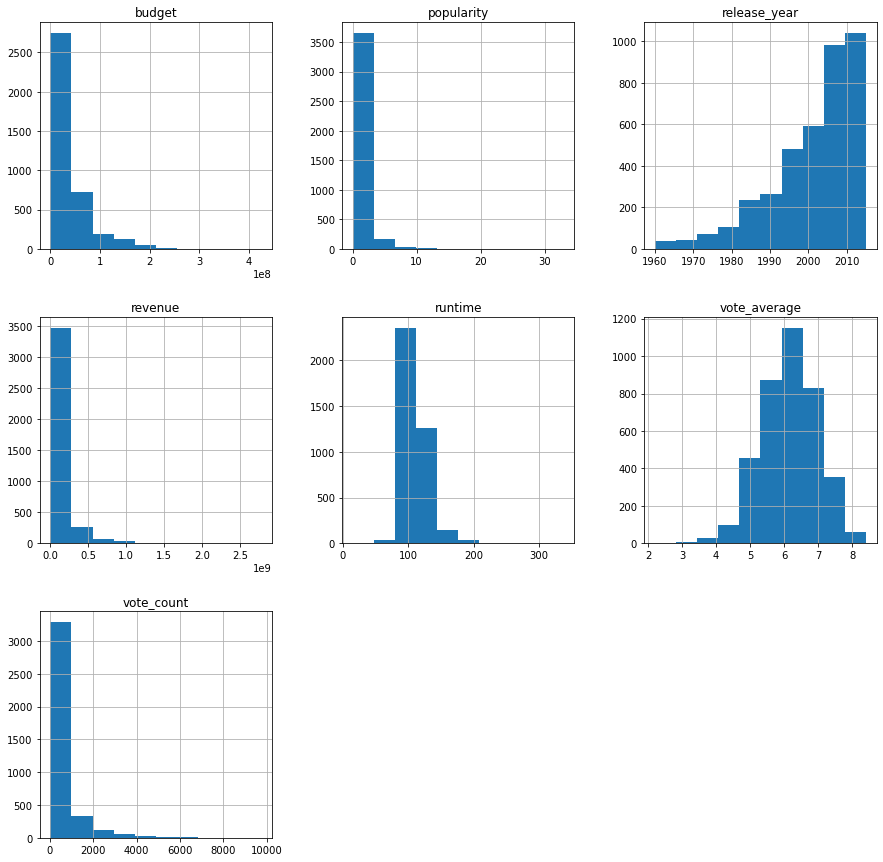

In [26]:
# histogram for each variable
tmdb_new.hist(figsize=(15,15));

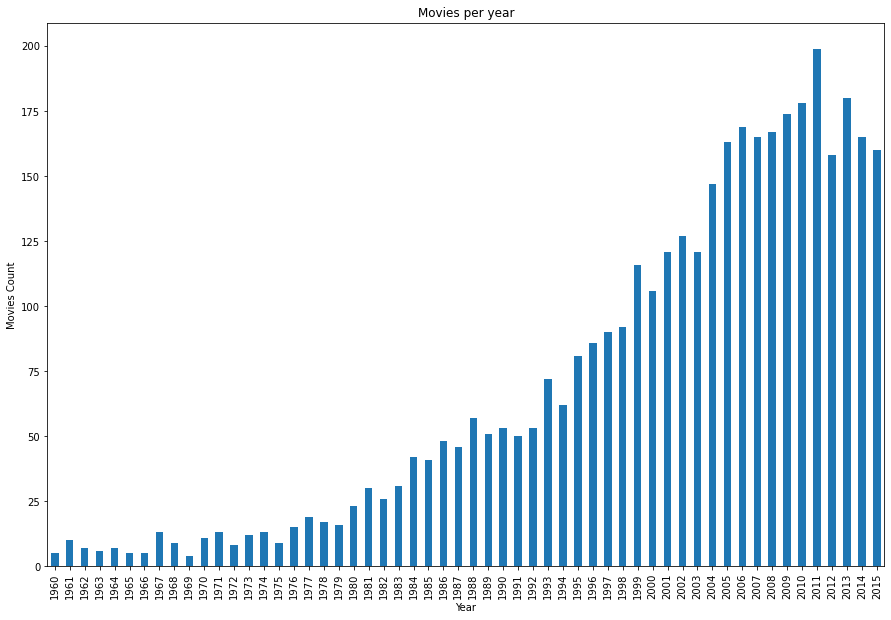

In [27]:
#plot release_year
tmdb_new['release_year'].value_counts().sort_index().plot.bar(figsize=(15,10));
plt.ylabel('Movies Count');
plt.xlabel('Year');
plt.title('Movies per year');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the previous histogram of the variables budget, popularity, revenue, vote_count, vote_average, release_year and runtime, it is apparent that revenue, runtime, popularity, vote_count and budget data are skewed to right while release_year is skewed to the left and vote_average is nearly a normal distribution.

From the bar plot of the movies over the years, it is evident that the movie entries range from 1960 to 2015 and the movies count increases throughout the years.

I personally did not see any unusual points at the moment but might do further along the investigation, also I did not perform any transformations.

 

<a id='bi'></a>
## Bivariate Exploration

What's the relationship between the movies budget and revenue?

First I will see the relation between the mean budget and mean revenue, then I will see the relationship of the highest budgeted movies and the highest revenued movies

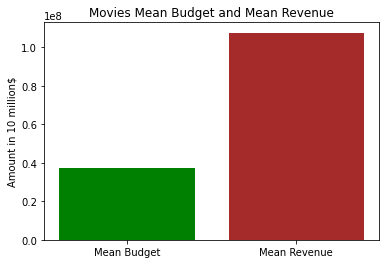

In [28]:
#find the means of budget and revenue
mean_budget = tmdb_new.budget.mean()
mean_revenue = tmdb_new.revenue.mean()

#plot a bar chart with two bars, one for mean budget, the other for mean revenue
plt.bar(['Mean Budget', 'Mean Revenue'], [mean_budget, mean_revenue], color=['Green', 'Brown'])
plt.title('Movies Mean Budget and Mean Revenue')
plt.ylabel('Amount in 10 million$');

The mean revenue is more than double the mean budget, now I will investigate the higher budgeted movies and their revenue, also the highest revenued movies and their budget.

In [29]:
#query movies with budget more than the mean budget
high_budget_movies = tmdb_new.query('budget > {}'.format(mean_budget))
high_budget_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.809648,8.165310e+07,2.237801e+08,115.003885,977.825175,6.130692,2004.841492
std,2.092166,4.641295e+07,2.489831e+08,20.903187,1234.552172,0.758568,6.742178
min,0.031018,3.766500e+07,1.440000e+02,74.000000,12.000000,2.200000,1978.000000
25%,0.776294,5.000000e+07,6.894899e+07,100.000000,216.500000,5.600000,2000.000000
50%,1.228370,6.600000e+07,1.492710e+08,113.000000,514.000000,6.100000,2005.000000
75%,2.084789,1.000000e+08,2.848884e+08,127.000000,1196.000000,6.600000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,219.000000,9767.000000,8.100000,2015.000000


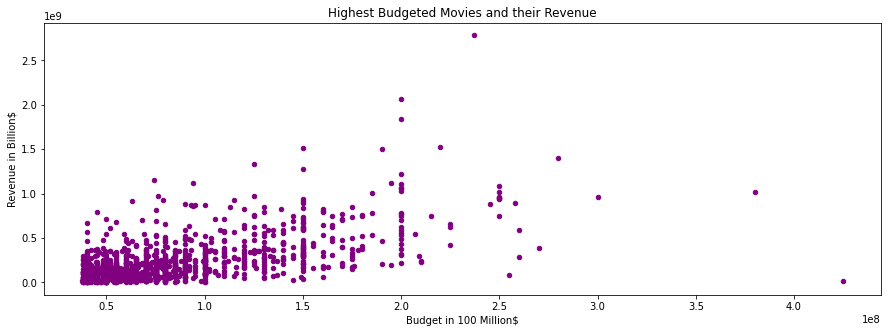

In [30]:
# Create a scatter plot for the highest budgeted movies
high_budget_movies.plot.scatter(x='budget',y='revenue',figsize=(15,5), color='purple') 
plt.title('Highest Budgeted Movies and their Revenue')
plt.xlabel('Budget in 100 Million$')
plt.ylabel('Revenue in Billion$')
plt.show() 

from the scatter plot above there seems to be a relationship between the highest budget movies and their respective revenue but it is not specific. most of the budget falls between the range of 50 million to 200 millions and most of it's corresponding revenue values falls between less than 500 million up to 1 billion dollars. 

In [31]:
#query movies with revenue more than the mean revenue
high_revenue_movies = tmdb_new.query('revenue > {}'.format(mean_revenue))
high_revenue_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1107.000000,1.107000e+03,1.107000e+03,1107.000000,1107.000000,1107.000000,1107.000000
mean,2.191528,7.426524e+07,2.934396e+08,115.581752,1242.360434,6.393225,2003.282746
std,2.213379,5.448290e+07,2.407357e+08,21.111119,1280.878310,0.707081,9.471500
min,0.131526,1.130000e+02,1.078795e+08,72.000000,14.000000,4.200000,1961.000000
25%,1.072666,3.400000e+07,1.492763e+08,100.000000,388.000000,5.900000,1998.000000
50%,1.615244,6.000000e+07,2.100000e+08,113.000000,781.000000,6.400000,2005.000000
75%,2.559995,1.000000e+08,3.473800e+08,128.000000,1643.000000,6.900000,2011.000000
max,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


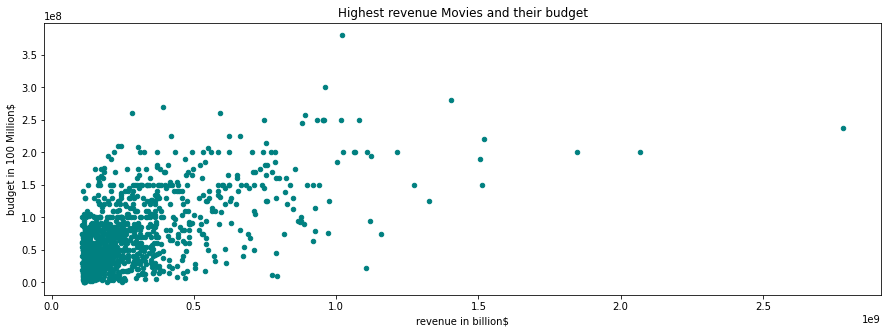

In [32]:
# Create a scatter plot for the highest revenue movies
high_revenue_movies.plot.scatter(x='revenue',y='budget',figsize=(15,5),color='teal') 
plt.title('Highest revenue Movies and their budget')
plt.xlabel('revenue in billion$')
plt.ylabel('budget in 100 Million$')
plt.show()

From the scatter plot above I can say that the relationship between the revenue and budget of the highest revenue movies seems less defined than the relationship between highest budgeted movies and their corrisponding budget, since it is more spread out. 

Now I will investigate the mean budget and the mean revenue over the years from the TMDB Movies dataset. 

In [33]:
#find the mean budget per year of movies grouped by their release year
mean_budget_by_years = tmdb_new.groupby('release_year').budget.mean()
mean_budget_by_years.head()

release_year
1960    4.161390e+06
1961    3.863700e+06
1962    5.635714e+06
1963    1.018583e+07
1964    4.847880e+06
Name: budget, dtype: float64

In [34]:
#find general statistics about the budget
mean_budget_by_years.describe()

count    5.600000e+01
mean     2.328698e+07
std      1.661075e+07
min      2.958032e+06
25%      7.861538e+06
50%      1.509790e+07
75%      4.245631e+07
max      4.802285e+07
Name: budget, dtype: float64

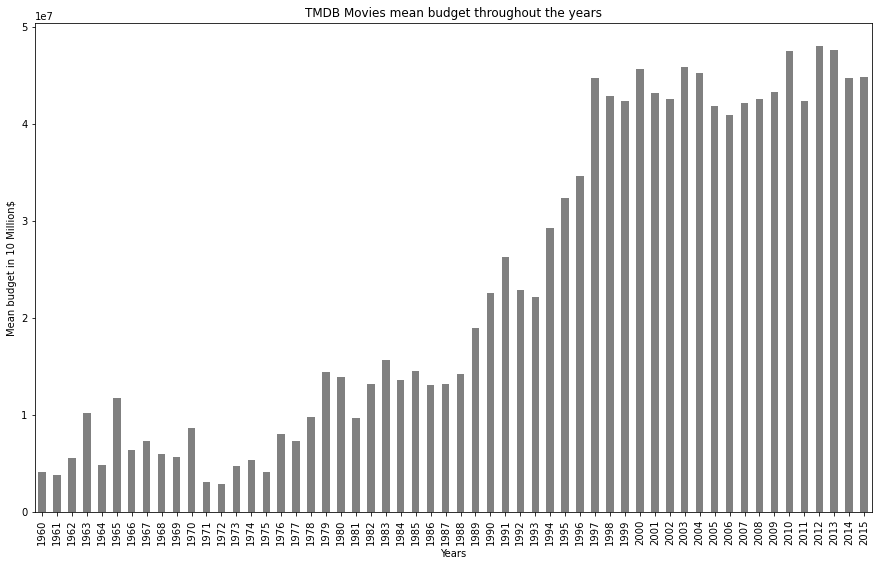

In [35]:
#plot mean budget per release year 
mean_budget_by_years.plot.bar(x=0, y=1,figsize=(15,9), color='grey');
plt.title('TMDB Movies mean budget throughout the years');
plt.xlabel('Years');
plt.ylabel('Mean budget in 10 Million$');
plt.show()

 From the graph above which is skewed to the left I think it's clear that the mean budget of the movies is increasing in general as the years go by then it started to go down again. the mean budget seems to be at it's lowest in 1972 and 1971, and at it's highest at 2012 and 2013. Next I will do the same for the revenue.

In [36]:
#find the mean revenue per year of movies grouped by their release year
mean_revenue_by_years = tmdb_new.groupby('release_year').revenue.mean()
mean_revenue_by_years.head()

release_year
1960    2.580100e+07
1961    3.377202e+07
1962    2.947569e+07
1963    2.942115e+07
1964    4.694479e+07
Name: revenue, dtype: float64

In [37]:
#find general statistics about the revenue
mean_revenue_by_years.describe()

count    5.600000e+01
mean     8.243045e+07
std      3.485129e+07
min      1.694734e+07
25%      5.534794e+07
50%      8.870526e+07
75%      1.062821e+08
max      1.637683e+08
Name: revenue, dtype: float64

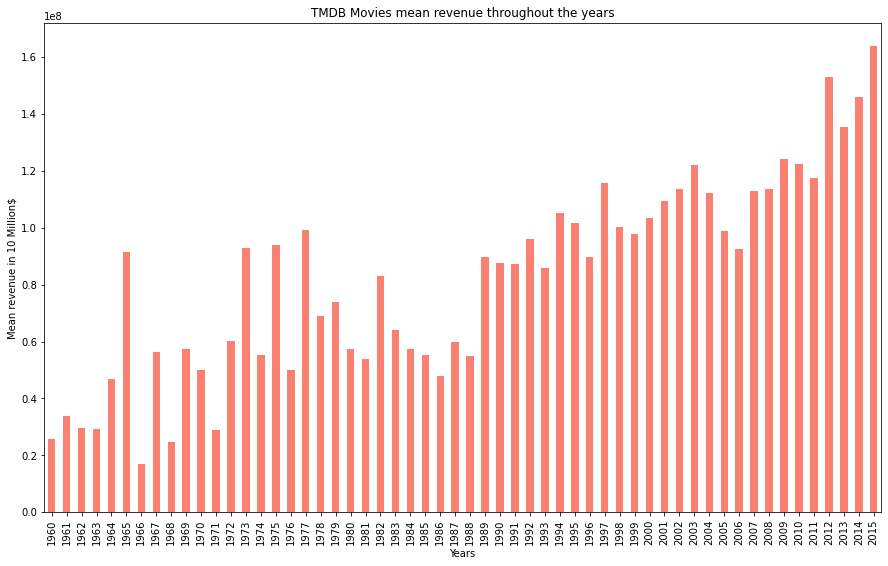

In [38]:
#plot mean revenue per release year 
mean_revenue_by_years.plot.bar(x=0, y=1,figsize=(15,9), color='salmon');
plt.title('TMDB Movies mean revenue throughout the years');
plt.xlabel('Years');
plt.ylabel('Mean revenue in 10 Million$');
plt.show()

From the graph above which is slightly skewed to the left, the movies revenue by the years is similar to the budget's plot,  the mean revenue seems to be at it's lowest in 1966, and at it's highest at 2015 and 2012. 

<a id='multi'></a>
## Multivariate Exploration

In this section will try to find the relationship between different variable combinations of the TMDB Movies dataset, starting by creating a correlation heatmap of the dataset


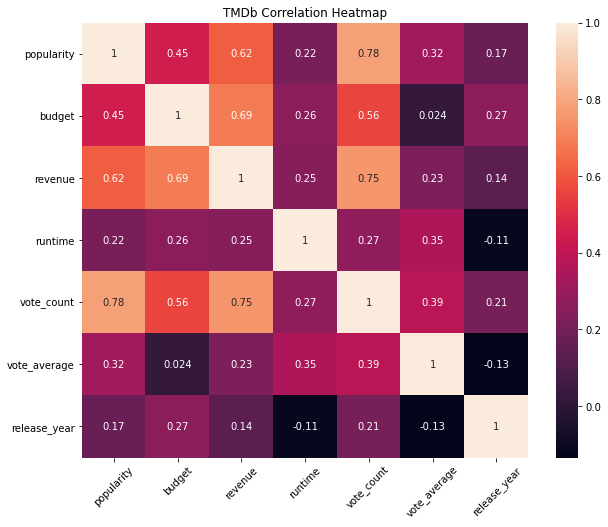

In [39]:
#create a heatmap for tmdb movies
plt.figure(figsize=(10,8))
sb.heatmap(tmdb_new.corr(), annot=True, cmap='rocket')
plt.title('TMDb Correlation Heatmap')
plt.xticks(rotation=45);

Acoording to the correlation heatmap above, I observed the following:

- There is indeed a strong realtionship between the budget and revenue as expected, yet interestingly there also seems to be a strong relationship between revenue and vote count.
- There is hardly any relationship between runtime and any other variable, same goes for release_year and unexpectedly vote_average.

So I will explore the relationship of the following variables based on the heatmap: **popularity, budget, revenue and vote_count.**

Firstly I will create a line plot to demonstrate the relationship between the variables, to do so I will find the mean popularity and mean vote_count by the years, the mean budget and mean revenue by the years have been done previously.

In [40]:
#find the mean popularity per year of movies grouped by their release year
mean_popularity_by_years = tmdb_new.groupby('release_year').popularity.mean()
mean_popularity_by_years.head()

release_year
1960    1.324513
1961    0.787718
1962    0.983485
1963    1.040612
1964    1.377790
Name: popularity, dtype: float64

In [41]:
#find the mean vote count per year of movies grouped by their release year
mean_votecount_by_years = tmdb_new.groupby('release_year').vote_count.mean()
mean_votecount_by_years.head()

release_year
1960    372.600000
1961    191.400000
1962    229.428571
1963    262.333333
1964    343.428571
Name: vote_count, dtype: float64

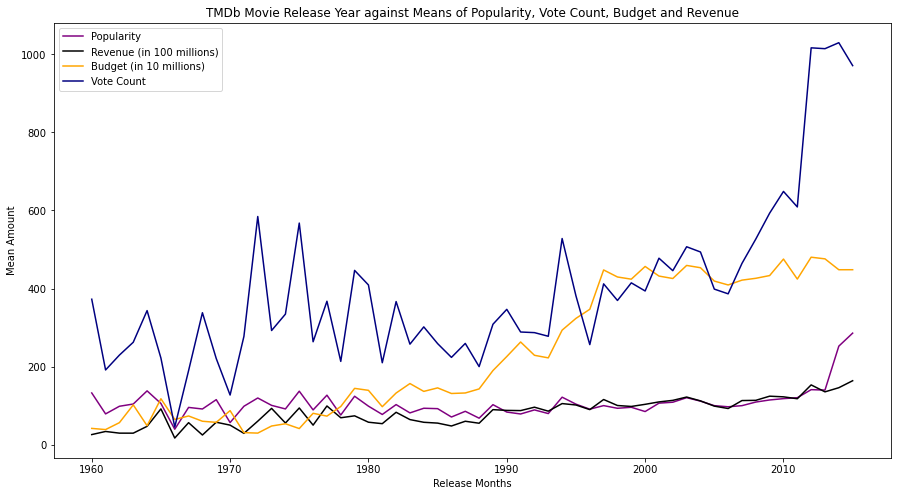

In [42]:
#creating line plot scaling all variables to be in the range of hundreds
plt.figure(figsize=(15,8))
plt.plot(mean_popularity_by_years.index, mean_popularity_by_years.values*100, label='Popularity', color='purple')
plt.plot(mean_revenue_by_years.index, mean_revenue_by_years.values/1000000, label='Revenue (in 100 millions)', color='black')
plt.plot(mean_budget_by_years.index, mean_budget_by_years.values/100000, label='Budget (in 10 millions)', color='orange')
plt.plot(mean_votecount_by_years.index, mean_votecount_by_years.values, label='Vote Count', color='navy')
plt.title('TMDb Movie Release Year against Means of Popularity, Vote Count, Budget and Revenue')
plt.xlabel('Release Months')
plt.ylabel('Mean Amount')
plt.legend()
plt.show();

From the previous line plot, which is skewed to the left, it shows that in general all variables tend to increase throughout the years. it also shows that popularity and revenue's lines are quite similar trend wise. 

To further investigate the variables' relationship I will make a bar plot, to aid the visiualization I will divide the budget, revenue, vote count and popularity by the decades then scale them to be able to plot them properly to investigate their relationship.

In [43]:
#divide years into decades for visualization
#1960-1969
sixty = tmdb_new.query('release_year >= 1960 and release_year <= 1969')
six = [sixty.popularity.mean(), sixty.revenue.mean(), sixty.budget.mean(), sixty.vote_count.mean()]
#1970-1979
seventy = tmdb_new.query('release_year >= 1970 and release_year <= 1979')
sev = [seventy.popularity.mean(), seventy.revenue.mean(), seventy.budget.mean(), seventy.vote_count.mean()]
#1980-1989
eighty = tmdb_new.query('release_year >= 1980 and release_year <= 1989')
eig = [eighty.popularity.mean(), eighty.revenue.mean(), eighty.budget.mean(), eighty.vote_count.mean()]
#1990-1999
ninty = tmdb_new.query('release_year >= 1990 and release_year <= 1999')
nin = [ninty.popularity.mean(), ninty.revenue.mean(), ninty.budget.mean(), ninty.vote_count.mean()]
#2000-2009
twozero = tmdb_new.query('release_year >= 2000 and release_year <= 2009')
two = [twozero.popularity.mean(), twozero.revenue.mean(), twozero.budget.mean(), twozero.vote_count.mean()]
#2010-2015
twoten = tmdb_new.query('release_year >= 2010 and release_year <= 2015')
ten = [twoten.popularity.mean(), twoten.revenue.mean(), twoten.budget.mean(), twoten.vote_count.mean()]

In [44]:
#getting the scaled popularity values
popularity1 = [six[0]*100, sev[0]*100, eig[0]*100, nin[0]*100, two[0]*100, ten[0]*100]
#getting the scaled revenue values
revenue1 = [six[1]/1000000, sev[1]/1000000, eig[1]/1000000, nin[1]/1000000, two[1]/1000000, ten[1]/1000000]
#getting the scaled budget values
budget1 = [six[2]/100000, sev[2]/100000, eig[2]/100000, nin[2]/100000, two[2]/100000, ten[2]/100000]
#getting the scaled vote average values
vote1 = [six[3], sev[3], eig[3], nin[3], two[3], ten[3]]

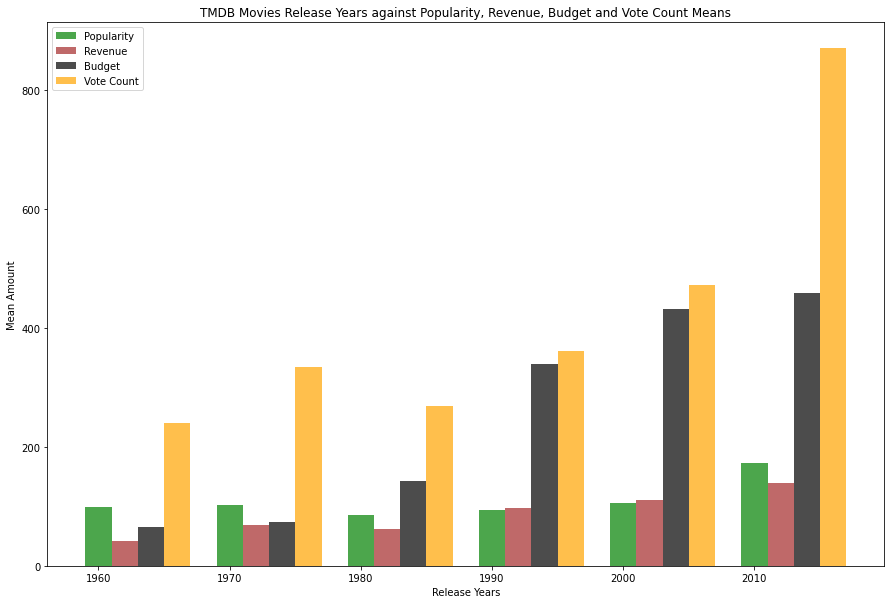

In [45]:
#creating decades names for xticks
decades = ['1960', '1970', '1980', '1990', '2000', '2010']
#creating a bar plot of TMDB Movies Release Years against Popularity, Revenue, Budget and Vote Count Means
plt.figure(figsize=(15,10))
X = np.arange(6)
plt.bar(X + 0.00, popularity1, color='g', alpha=0.7, width = 0.20, label='Popularity')
plt.bar(X + 0.20, revenue1, color='brown', alpha=0.7, width = 0.20, label='Revenue')
plt.bar(X + 0.40, budget1, color='black', alpha=0.7, width = 0.20, label='Budget')
plt.bar(X + 0.60, vote1, color='orange', alpha=0.7, width = 0.20, label='Vote Count')
plt.title('TMDB Movies Release Years against Popularity, Revenue, Budget and Vote Count Means')
plt.xticks([0, 1, 2, 3, 4, 5], decades)
plt.xlabel('Release Years')
plt.ylabel('Mean Amount')
plt.legend()
plt.show();

From the bar plot above it seems that there is not a clear trend going across the variables, for instance the mean vote count is clearly inceasing throughout the years so does the budget mean and revenue mean. as for the popularity mean it is fluctuating.

### Talk about some of the relationships you observed in this part of the investigation. 

Through the exploration of the TMDB Movies dataset, I noticed that there are some relationships between the variables according to the correlation heatmap such as: relationship between vote count and popularity, also budget and revenue. surprisingly there is also a relationship between vote count and revenue. mosts of the plots are left skewed and the overall trend of the data seems to be increasing over the years except for the vote count and budget which started to decrease from the 2010s.

### Were there any interesting or surprising interactions between features?

I didn't expect the vote count and budget ,revenue and vote count to be somewhat correlated, I expected vote average to be more correlated but it wasn't according to the correlation heatmap.   

### As a summary I will answer the questions asked previously:

**1- Do higher budget movies have higher revenues?**

yes, as investigated there is a relationship between budget and revenue, most of the highest movies budget fall between the range of 50 million to 200 millions and most of their corresponding revenue values fall between less than 500 million up to 1 billion dollars, which is more defined and correlated than the relationship of the highest revenue movies with their corresponding budget.

**2- How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget?**

the mean of movies budget is definitely increasing througout the years, and No there is not relationship between the movies release year and its budget as shown previously in the correlation heatmap.

**3- What are the relationships between the variables of TMDB movies dataset?**

Through the exploration of the TMDB Movies dataset, I noticed that there are some relationships between the variables according to the correlation heatmap such as: relationship between vote count and popularity, also budget and revenue. surprisingly there is also a relationship between vote count and revenue. mosts of the plots are left skewed and the overall trend of the data seems to be increasing over the years except for the vote count and budget which started to decrease from the 2010s